# 1.패키지 가져옴

In [ ]:
# 한글 불러옴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,039 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123576 files and dire

In [ ]:
# 런타임 다시 시작

# 데이터 분석과 관련된 필수 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 분석 및 모델링을 위한 패키지 import

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# Google Colab에서 드라이브 마운트
from google.colab import drive

# 기타 유용한 패키지 import
import os
import datetime
import time

# 나눔고딕 폰트 설정
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')

# 2.데이터 가져오기 및 확인 (df_)

In [ ]:
# 동별 전처리 필요
drive.mount('/content/drive')
df0 = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/최종병합데이터_소현.csv')

# 구별
# 유동인구
df1 = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/구별_유동인구.csv')
# 종사자, 폐기물 등
df2 = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/종사자수등.csv')
# 요일 등 사고
df3 = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/조건별사고비율.csv')

Mounted at /content/drive


In [ ]:
df3

,자치구,남자,여자,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,...,70대,80대 이상,Afternoon,Early Morning,Evening,Late Night,Morning,Night,평균알콜농도,총적발횟수
0,강남구,0.847347,0.152653,0.154154,0.099600,0.191692,0.133634,0.140140,0.136136,0.144645,...,0.002002,0.000000,0.033033,0.146146,0.043544,0.384885,0.060561,0.331832,0.126381,1
1,강동구,0.895038,0.104962,0.150763,0.124046,0.196565,0.131679,0.133588,0.116412,0.146947,...,0.009542,0.000000,0.041985,0.120229,0.076336,0.341603,0.040076,0.379771,0.128860,1
2,강북구,0.926606,0.073394,0.141284,0.121101,0.174312,0.194495,0.130275,0.113761,0.124771,...,0.007339,0.001835,0.033028,0.097248,0.031193,0.346789,0.067890,0.423853,0.111877,1
3,강서구,0.917133,0.082867,0.159015,0.108623,0.179171,0.150056,0.162374,0.107503,0.133259,...,0.008959,0.001120,0.030235,0.148936,0.063830,0.301232,0.057111,0.398656,0.122815,1
4,관악구,0.927454,0.072546,0.147937,0.113798,0.180654,0.167852,0.139403,0.118065,0.132290,...,0.012802,0.000000,0.034139,0.133713,0.061166,0.388336,0.076814,0.305832,0.125279,1
5,광진구,0.906690,0.093310,0.149648,0.107394,0.177817,0.174296,0.146127,0.109155,0.135563,...,0.001761,0.001761,0.017606,0.110915,0.045775,0.443662,0.051056,0.330986,0.121810,1
6,구로구,0.923596,0.076404,0.107865,0.132584,0.188764,0.159551,0.150562,0.105618,0.155056,...,0.002247,0.000000,0.035955,0.139326,0.096629,0.332584,0.047191,0.348315,0.124835,1
7,금천구,0.920821,0.079179,0.140762,0.085044,0.193548,0.175953,0.129032,0.137830,0.137830,...,0.002933,0.000000,0.043988,0.146628,0.079179,0.316716,0.043988,0.369501,0.137443,1
8,노원구,0.896353,0.103647,0.126679,0.111324,0.224568,0.170825,0.130518,0.119002,0.117083,...,0.007678,0.000000,0.024952,0.138196,0.061420,0.376200,0.065259,0.333973,0.122640,1
9,도봉구,0.905882,0.094118,0.160784,0.105882,0.180392,0.227451,0.145098,0.070588,0.109804,...,0.003922,0.000000,0.062745,0.188235,0.074510,0.294118,0.054902,0.325490,0.134306,1


###df0 동별을 구별로 다시 병합 및 전처리

In [ ]:
df0.columns

Index(['Unnamed: 0', '행정동명', '시군구명', '행정동명.1', '행정동코드', 'CCTV개수', '가로등개수',
       '버스정류소개수', '음식점개수', '주점개수', '주차장개수', '지하철역개수', '자동차소유대수', '22년 음주단속수',
       '사고건수', '음주운전_y'],
      dtype='object')

In [ ]:
df0.head()

,Unnamed: 0,행정동명,시군구명,행정동명.1,행정동코드,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,주차장개수,지하철역개수,자동차소유대수,22년 음주단속수,사고건수,음주운전_y
0,0,강남구 개포1동,강남구,개포1동,1168066000,57.0,0.0,15.0,6.0,0.0,30.0,0.0,3875.0,1998,0.0,1998.0
1,1,강남구 개포2동,강남구,개포2동,1168067000,231.0,0.0,34.0,94.0,8.0,154.0,3.0,10266.0,1998,3.0,4998.0
2,2,강남구 개포3동,강남구,개포3동,1168067500,108.0,102.0,11.0,43.0,1.0,29.0,1.0,6205.0,1998,0.0,1998.0
3,3,강남구 개포4동,강남구,개포4동,1168069000,381.0,0.0,28.0,141.0,19.0,1026.0,0.0,8552.0,1998,0.0,1998.0
4,4,강남구 논현1동,강남구,논현1동,1168052100,478.0,0.0,17.0,548.0,106.0,2136.0,2.0,10388.0,1998,15.0,16998.0


### 신사동 데이터 해결

In [ ]:
df0[df0['행정동명.1']=="신사동"]
# 주차장 1178
# 지하철역 2
# 자동차 소유 7748

,Unnamed: 0,행정동명,시군구명,행정동명.1,행정동코드,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,주차장개수,지하철역개수,자동차소유대수,22년 음주단속수,사고건수,음주운전_y
15,15,강남구 신사동,강남구,신사동,1168051000,314.0,304.0,16.0,576.0,99.0,0.0,0.0,0.0,1998,4.0,5998.0
87,87,관악구 신사동,관악구,신사동,1162068500,228.0,2.0,17.0,147.0,41.0,2055.0,0.0,7748.0,703,0.0,703.0
88,88,관악구 신사동,관악구,신사동,1162068500,228.0,2.0,17.0,147.0,41.0,2055.0,0.0,5117.0,703,0.0,703.0


In [ ]:
df0.iloc[15,10] = 1178
df0.iloc[15,11] = 2
df0.iloc[15,12] =7748
df0.drop(87, inplace=True)
df0[df0['행정동명.1']=="신사동"]

,Unnamed: 0,행정동명,시군구명,행정동명.1,행정동코드,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,주차장개수,지하철역개수,자동차소유대수,22년 음주단속수,사고건수,음주운전_y
15,15,강남구 신사동,강남구,신사동,1168051000,314.0,304.0,16.0,576.0,99.0,1178.0,2.0,7748.0,1998,4.0,5998.0
88,88,관악구 신사동,관악구,신사동,1162068500,228.0,2.0,17.0,147.0,41.0,2055.0,0.0,5117.0,703,0.0,703.0


In [ ]:
df0.describe()

,Unnamed: 0,행정동코드,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,주차장개수,지하철역개수,자동차소유대수,22년 음주단속수,사고건수,음주운전_y
count,427.000000,4.270000e+02,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,213.796253,1.143486e+09,130.112412,44.177986,26.487119,196.126464,39.437939,717.573770,0.641686,7442.901639,666.489461,1.297424,1963.913349
std,123.690201,1.924241e+07,97.623482,89.370312,14.956014,183.132915,47.666415,534.769281,0.778493,3713.604729,400.694042,3.616351,3766.472920
min,0.000000,1.111052e+09,1.000000,0.000000,1.000000,0.000000,0.000000,15.000000,0.000000,545.000000,255.000000,0.000000,255.000000
25%,107.500000,1.126066e+09,51.000000,0.000000,15.000000,91.500000,12.000000,301.000000,0.000000,4940.000000,433.000000,0.000000,434.000000
50%,214.000000,1.144066e+09,112.000000,0.000000,24.000000,147.000000,25.000000,618.000000,0.000000,6879.000000,524.000000,0.000000,564.000000
75%,320.500000,1.162054e+09,193.000000,42.500000,34.000000,248.000000,52.000000,1064.000000,1.000000,8968.500000,893.000000,0.000000,1998.000000
max,427.000000,1.174070e+09,704.000000,665.000000,102.000000,1634.000000,471.000000,3172.000000,4.000000,26665.000000,1998.000000,52.000000,53998.000000


In [ ]:
# 병합 안함
# df0['음식점및주점개수'] = df0['음식점개수'] + df0['주점개수']

In [ ]:
# 해당 행 필터링
# 길동 성내2동 성내3동 천호2동
df0[df0['행정동명.1'] == '천호2동']

#강동구 한 행정동에 27건 음주운전


,Unnamed: 0,행정동명,행정동명.1,행정동코드,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,주차장개수,지하철역개수,자동차소유대수,22년 음주단속수,사고건수,음주운전_y
시군구명,,,,,,,,,,,,,,,
강동구,40,강동구 천호2동,천호2동,1174061000,159.0,327.0,27.0,365.0,92.0,1689.0,0.0,9412.0,524,6.0,6524.0


## 모델링할 데이터 준비 (grouped_df)

In [ ]:
# 시군구명을 인덱스로 설정
df0.set_index('시군구명', inplace=True)

In [ ]:
# 특정 열을 제외하고 나머지 열의 0값을 NaN으로 대체
columns_to_replace = ['가로등개수', '음식점개수', '주점개수']
df0[columns_to_replace] = df0[columns_to_replace].replace(0, np.nan)

# 시군구명으로 그룹바이하고 평균 계산
grouped_df = df0.groupby(df0.index)[['CCTV개수', '가로등개수', '버스정류소개수', '음식점개수', '주점개수',
                            '주차장개수', '지하철역개수','자동차소유대수', '사고건수','22년 음주단속수']].mean().reset_index()


In [ ]:
grouped_df

,시군구명,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,주차장개수,지하철역개수,자동차소유대수,사고건수,22년 음주단속수
0,강남구,306.772727,200.444444,25.409091,350.318182,58.571429,935.409091,1.227273,11134.590909,7.409091,1998.0
1,강동구,72.400000,157.833333,22.050000,164.947368,36.333333,806.050000,0.600000,7594.700000,1.000000,524.0
2,강북구,106.307692,NaN,32.076923,177.153846,46.846154,896.153846,0.846154,5778.230769,0.461538,545.0
3,강서구,113.800000,150.000000,31.200000,207.400000,45.600000,969.350000,0.800000,10313.050000,1.400000,893.0
4,관악구,220.000000,21.333333,23.190476,161.190476,43.380952,1005.238095,0.238095,5625.523810,0.809524,703.0
5,광진구,46.800000,162.444444,19.533333,200.266667,42.533333,1094.066667,0.533333,6603.266667,0.800000,568.0
6,구로구,232.687500,32.363636,31.875000,188.375000,41.062500,606.500000,0.500000,9113.187500,3.375000,445.0
7,금천구,214.900000,31.000000,35.000000,225.300000,47.500000,873.300000,0.200000,9042.200000,1.700000,341.0
8,노원구,98.526316,60.363636,27.526316,142.157895,24.631579,321.105263,0.578947,8008.736842,0.000000,521.0
9,도봉구,74.214286,16.250000,26.000000,127.214286,26.142857,723.285714,0.428571,6823.071429,1.071429,255.0


### 동단위로 단속 수 변환

In [ ]:
divide_values = {
    '강북구': 13,
    '종로구': 17,
    '중구': 15,
    '용산구': 16,
    '성동구': 17,
    '광진구': 15,
    '동대문구' :14,
    '중랑구' :16,
    '성북구' :20,
    '도봉구' :14,
    '노원구' :19,
    '은평구' :16,
    '서대문구':14,
    '마포구' :16,
    '양천구' :18,
    '강서구' :20,
    '구로구' :16,
    '금천구' :10,
    '영등포구':18,
    '동작구':15,
    '관악구':21,
    '서초구':18,
    '강남구':22,
    '송파구':27,
    '강동구':19
}
# 행정동 개수만큼 나누기

In [ ]:
def divide_by_region(row):
    region = row['시군구명']
    if region in divide_values:
        return row['22년 음주단속수'] / divide_values[region]
    else:
        return row['22년 음주단속수']  # 만약 정의되지 않은 시군구명이 있다면 원래 값을 유지

# '음주단속수' 값을 변환
grouped_df['평균음주단속건'] = grouped_df.apply(divide_by_region, axis=1)

In [ ]:
grouped_df

,시군구명,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,주차장개수,지하철역개수,자동차소유대수,사고건수,22년 음주단속수,평균음주단속건
0,강남구,306.772727,200.444444,25.409091,350.318182,58.571429,935.409091,1.227273,11134.590909,7.409091,1998.0,90.818182
1,강동구,72.400000,157.833333,22.050000,164.947368,36.333333,806.050000,0.600000,7594.700000,1.000000,524.0,27.578947
2,강북구,106.307692,NaN,32.076923,177.153846,46.846154,896.153846,0.846154,5778.230769,0.461538,545.0,41.923077
3,강서구,113.800000,150.000000,31.200000,207.400000,45.600000,969.350000,0.800000,10313.050000,1.400000,893.0,44.650000
4,관악구,220.000000,21.333333,23.190476,161.190476,43.380952,1005.238095,0.238095,5625.523810,0.809524,703.0,33.476190
5,광진구,46.800000,162.444444,19.533333,200.266667,42.533333,1094.066667,0.533333,6603.266667,0.800000,568.0,37.866667
6,구로구,232.687500,32.363636,31.875000,188.375000,41.062500,606.500000,0.500000,9113.187500,3.375000,445.0,27.812500
7,금천구,214.900000,31.000000,35.000000,225.300000,47.500000,873.300000,0.200000,9042.200000,1.700000,341.0,34.100000
8,노원구,98.526316,60.363636,27.526316,142.157895,24.631579,321.105263,0.578947,8008.736842,0.000000,521.0,27.421053
9,도봉구,74.214286,16.250000,26.000000,127.214286,26.142857,723.285714,0.428571,6823.071429,1.071429,255.0,18.214286


# 모델링

### 종속변수, 독립변수 설정

In [ ]:
xcol = ['버스정류소개수', '음식점개수', '주점개수','지하철역개수','자동차소유대수']
ycol = ['평균음주단속건']

X = grouped_df[xcol]
y = grouped_df[ycol]

In [ ]:
# 데이터 시각화: 쌍플롯
def pairplot_visualization(df, x_columns, y_columns):
    sns.pairplot(df, vars=x_columns + y_columns, kind='scatter', diag_kind='kde')
    plt.show()


데이터 시각화: 쌍플롯


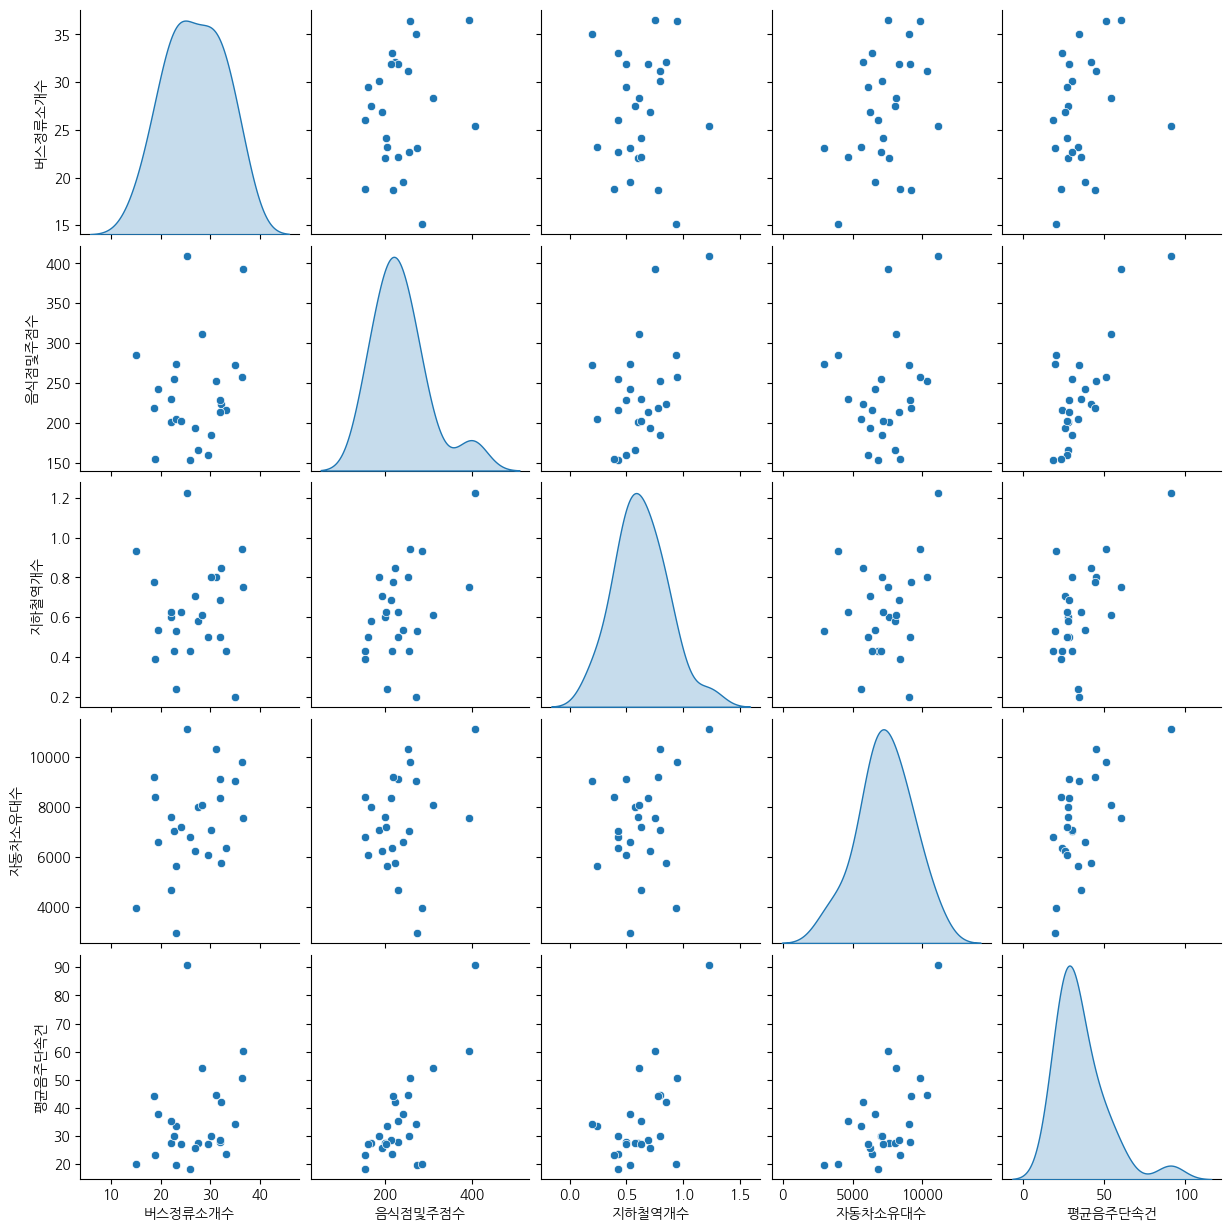

In [ ]:
# 데이터 시각화: 쌍플롯
print("\n데이터 시각화: 쌍플롯")
pairplot_visualization(grouped_df, xcol, ycol)

In [ ]:
# 데이터 시각화: 상관계수 히트맵
def correlation_heatmap(df, x_columns, y_columns):
    correlation_matrix = correlation_analysis(df, x_columns, y_columns)
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8},
                 vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()

# 상관관계 분석
def correlation_analysis(df, x_columns, y_columns):
    correlation_matrix = df[x_columns + y_columns].corr()
    return correlation_matrix


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


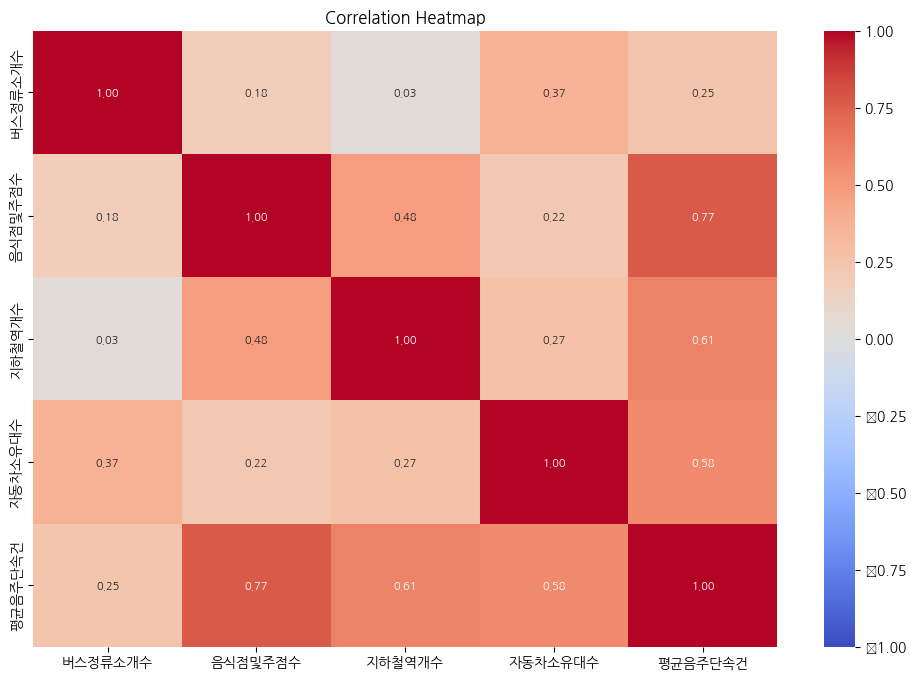

In [ ]:

correlation_heatmap(grouped_df, xcol, ycol)

### 다중공선성 계산

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

   feature        VIF
0  버스정류소개수  19.040705
1  음식점및주점수  18.350930
2   지하철역개수  11.670831
3  자동차소유대수  18.718849


In [ ]:
grouped_df['음식점및주점수'] = grouped_df['음식점개수'] + grouped_df['주점개수']
grouped_df.head()

,시군구명,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,주차장개수,지하철역개수,자동차소유대수,사고건수,22년 음주단속수,평균음주단속건,음식점및주점수
0,강남구,306.772727,200.444444,25.409091,350.318182,58.571429,935.409091,1.227273,11134.590909,7.409091,1998.0,90.818182,408.889610
1,강동구,72.400000,157.833333,22.050000,164.947368,36.333333,806.050000,0.600000,7594.700000,1.000000,524.0,27.578947,201.280702
2,강북구,106.307692,NaN,32.076923,177.153846,46.846154,896.153846,0.846154,5778.230769,0.461538,545.0,41.923077,224.000000
3,강서구,113.800000,150.000000,31.200000,207.400000,45.600000,969.350000,0.800000,10313.050000,1.400000,893.0,44.650000,253.000000
4,관악구,220.000000,21.333333,23.190476,161.190476,43.380952,1005.238095,0.238095,5625.523810,0.809524,703.0,33.476190,204.571429


In [ ]:
# 다중공선성 합침
xcol = ['버스정류소개수', '음식점및주점수','지하철역개수','자동차소유대수']
X = grouped_df[xcol]

In [ ]:
# VIF 계산
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

In [ ]:
# 데이터 시각화: 쌍플롯
print("\n데이터 시각화: 쌍플롯")
pairplot_visualization(grouped_df, xcol, ycol)

In [ ]:
X

,버스정류소개수,음식점개수,주점개수,지하철역개수,자동차소유대수
0,25.409091,350.318182,58.571429,1.227273,11134.590909
1,22.050000,164.947368,36.333333,0.600000,7594.700000
2,32.076923,177.153846,46.846154,0.846154,5778.230769
3,31.200000,207.400000,45.600000,0.800000,10313.050000
4,23.190476,161.190476,43.380952,0.238095,5625.523810
5,19.533333,200.266667,42.533333,0.533333,6603.266667
6,31.875000,188.375000,41.062500,0.500000,9113.187500
7,35.000000,225.300000,47.500000,0.200000,9042.200000
8,27.526316,142.157895,24.631579,0.578947,8008.736842
9,26.000000,127.214286,26.142857,0.428571,6823.071429


In [ ]:
# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 랜덤포레스트 모델링

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# 랜덤 포레스트 모델 훈련
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 랜덤 포레스트 예측
rf_predictions = rf_model.predict(X_test)

# 랜덤 포레스트 설명력 (R^2 스코어)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"랜덤 포레스트 모델 설명력 (R^2): {rf_r2}")


랜덤 포레스트 모델 설명력 (R^2): 0.2898238640489287


<ipython-input-42-cfd9805a9fbe>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


### 피처중요도 확인

In [ ]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# 모델 피팅1
model.fit(X, y)

# 피처 중요도 확인
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 피처 중요도 출력
print("피처 중요도:\n", feature_importances)

In [ ]:
# 피처 중요도를 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', edgecolor='k')
plt.title('피처 중요도')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### 다변량 회귀 모델링

In [ ]:
# 다변량 회귀 모델 훈련
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 다변량 회귀 예측
lr_predictions = lr_model.predict(X_test)

# 다변량 회귀 설명력 (R^2 스코어)
lr_r2 = r2_score(y_test, lr_predictions)
print(f"다변량 회귀 모델 설명력 (R^2): {lr_r2}")

다변량 회귀 모델 설명력 (R^2): 0.7695477526823093


### OLS 회귀 모델링

In [ ]:
import statsmodels.api as sm

# OLS 회귀 모델 훈련 및 결과 확인
X_train_sm = sm.add_constant(X_train)  # 상수항 추가
ols_model = sm.OLS(y_train, X_train_sm).fit()

# OLS 모델 요약 정보 출력
print(ols_model.summary())

# OLS 모델 예측
X_test_sm = sm.add_constant(X_test)  # 상수항 추가
ols_predictions = ols_model.predict(X_test_sm)

# OLS 모델 설명력 (R^2 스코어)
ols_r2 = r2_score(y_test, ols_predictions)
print(f"OLS 모델 설명력 (R^2): {ols_r2}")

                            OLS Regression Results                            
Dep. Variable:                평균음주단속건   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     9.522
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           0.000400
Time:                        09:34:53   Log-Likelihood:                -62.252
No. Observations:                  20   AIC:                             136.5
Df Residuals:                      14   BIC:                             142.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.0032      9.340     -2.356      0.0

### 모델링 검증

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 다변량 회귀 모델 정확도
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)

print(f"다변량 회귀 모델 MAE: {lr_mae}")
print(f"다변량 회귀 모델 MSE: {lr_mse}")
print(f"다변량 회귀 모델 RMSE: {lr_rmse}")

# OLS 모델 정확도
ols_mae = mean_absolute_error(y_test, ols_predictions)
ols_mse = mean_squared_error(y_test, ols_predictions)
ols_rmse = np.sqrt(ols_mse)

print(f"OLS 모델 MAE: {ols_mae}")
print(f"OLS 모델 MSE: {ols_mse}")
print(f"OLS 모델 RMSE: {ols_rmse}")

다변량 회귀 모델 MAE: 9.699937711674291
다변량 회귀 모델 MSE: 156.95313995202181
다변량 회귀 모델 RMSE: 12.52809402710651
OLS 모델 MAE: 9.699937711673423
OLS 모델 MSE: 156.95313995198433
OLS 모델 RMSE: 12.528094027105015


MAE만 오차 절댓값 사용

# 실제 행정동 예측

### 실제 행정동 데이터 불러옴

In [ ]:
# 행정동 데이터 가져옴 및 신사동 처리

new_df = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/최종병합데이터_소현.csv')
new_df[new_df['행정동명.1']=="신사동"]
new_df.iloc[15,10] = 1178
new_df.iloc[15,11] = 2
new_df.iloc[15,12] =7748
new_df.drop(87, inplace=True)
new_df[new_df['행정동명.1']=="신사동"]

,Unnamed: 0,행정동명,시군구명,행정동명.1,행정동코드,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,주차장개수,지하철역개수,자동차소유대수,22년 음주단속수,사고건수,음주운전_y
15,15,강남구 신사동,강남구,신사동,1168051000,314.0,304.0,16.0,576.0,99.0,1178.0,2.0,7748.0,1998,4.0,5998.0
88,88,관악구 신사동,관악구,신사동,1162068500,228.0,2.0,17.0,147.0,41.0,2055.0,0.0,5117.0,703,0.0,703.0


In [ ]:
# 예측에 필요한 데이터만 남기기

col = ['행정동명','시군구명', '행정동명.1', '행정동코드', '버스정류소개수',
       '음식점개수', '주점개수', '지하철역개수', '자동차소유대수']
new_df = new_df[col]

In [ ]:
new_df.head()

,행정동명,시군구명,행정동명.1,행정동코드,버스정류소개수,음식점개수,주점개수,지하철역개수,자동차소유대수
0,강남구 개포1동,강남구,개포1동,1168066000,15.0,6.0,0.0,0.0,3875.0
1,강남구 개포2동,강남구,개포2동,1168067000,34.0,94.0,8.0,3.0,10266.0
2,강남구 개포3동,강남구,개포3동,1168067500,11.0,43.0,1.0,1.0,6205.0
3,강남구 개포4동,강남구,개포4동,1168069000,28.0,141.0,19.0,0.0,8552.0
4,강남구 논현1동,강남구,논현1동,1168052100,17.0,548.0,106.0,2.0,10388.0


### 예측값 생성

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression


# 모델 생성 및 훈련 (이전 단계에서 완료된 코드)
# X와 y 설정
xcol = ['버스정류소개수','음식점개수', '주점개수', '지하철역개수', '자동차소유대수']  # 피쳐 컬럼들
ycol = '가로등개수'  # 타겟 컬럼


# 새로운 데이터프레임에 예측값 생성
new_df['예측건수'] = lr_model.predict(new_df[xcol])


print("예측된 데이터프레임:")
print(new_df)


예측된 데이터프레임:
         행정동명 시군구명 행정동명.1       행정동코드  버스정류소개수  음식점개수   주점개수  지하철역개수  자동차소유대수  \
0    강남구 개포1동  강남구   개포1동  1168066000     15.0    6.0    0.0     0.0   3875.0   
1    강남구 개포2동  강남구   개포2동  1168067000     34.0   94.0    8.0     3.0  10266.0   
2    강남구 개포3동  강남구   개포3동  1168067500     11.0   43.0    1.0     1.0   6205.0   
3    강남구 개포4동  강남구   개포4동  1168069000     28.0  141.0   19.0     0.0   8552.0   
4    강남구 논현1동  강남구   논현1동  1168052100     17.0  548.0  106.0     2.0  10388.0   
..        ...  ...    ...         ...      ...    ...    ...     ...      ...   
423  중랑구 상봉2동  중랑구   상봉2동  1126059000     14.0  334.0  116.0     1.0   5353.0   
424  중랑구 신내1동  중랑구   신내1동  1126068000     52.0  176.0   25.0     1.0  12815.0   
425  중랑구 신내2동  중랑구   신내2동  1126069000     20.0   77.0    8.0     0.0   6891.0   
426  중랑구 중화1동  중랑구   중화1동  1126060000     14.0   53.0    7.0     0.0   5571.0   
427  중랑구 중화2동  중랑구   중화2동  1126061000     28.0  230.0   57.0     1.0   6185.0   

           예측건수

In [ ]:
# 시군구명별로 예측건수 상위 5개와 하위 5개 선택
def top_and_bottom(df, n=5):
    top_n = df.nlargest(n, '예측건수')
    bottom_n = df.nsmallest(n, '예측건수')
    return pd.concat([top_n, bottom_n])

result = new_df.groupby('시군구명').apply(top_and_bottom).reset_index(drop=True)

# 예측된 결과 출력
print("예측건수가 가장 높은 5개와 가장 낮은 5개:")
result

예측건수가 가장 높은 5개와 가장 낮은 5개:


,행정동명,시군구명,행정동명.1,행정동코드,버스정류소개수,음식점개수,주점개수,지하철역개수,자동차소유대수,예측건수
0,강남구 역삼1동,강남구,역삼1동,1168064000,51.0,1634.0,310.0,3.0,21032.0,359.891998
1,강남구 압구정동,강남구,압구정동,1168054500,25.0,679.0,161.0,2.0,12258.0,170.207879
2,강남구 논현2동,강남구,논현2동,1168053100,26.0,698.0,112.0,2.0,10196.0,150.275466
3,강남구 논현1동,강남구,논현1동,1168052100,17.0,548.0,106.0,2.0,10388.0,134.800606
4,강남구 신사동,강남구,신사동,1168051000,16.0,576.0,99.0,2.0,7748.0,129.687805
...,...,...,...,...,...,...,...,...,...,...
245,중랑구 면목5동,중랑구,면목5동,1126055000,13.0,61.0,9.0,0.0,4711.0,-5.212067
246,중랑구 중화1동,중랑구,중화1동,1126060000,14.0,53.0,7.0,0.0,5571.0,-5.107852
247,중랑구 신내2동,중랑구,신내2동,1126069000,20.0,77.0,8.0,0.0,6891.0,-0.872118
248,중랑구 망우3동,중랑구,망우3동,1126066000,10.0,72.0,19.0,0.0,5274.0,1.653392


In [ ]:
result.to_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/3 시각화 및 결과/상위예측지역.csv')

## 여기까지